In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torch.optim as optim
import numpy as np
print(torch.cuda.is_available())

True


In [2]:
device = torch.device('cuda')
batch_size=100
trans = torchvision.transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=trans, download=True)

def batch_data(X,batch_size,device=torch.device('cuda')):
    temp_x=[i[0][0].unsqueeze_(0) for i in X]#升维再导入
    data_x=torch.cat(temp_x).reshape(batch_size,-1,28,28).unsqueeze_(2)#加上通道数
    data_y=torch.tensor([i[1] for i in X]).reshape(batch_size,-1)
    return data_x.to(device),data_y.to(device)

def plot_res():
    fig,ax=plt.subplots(1,2)
    for i in range(len(loss_arr)):
        if(isinstance(loss_arr[i],np.ndarray)==False):
            loss_arr[i]=loss_arr[i].to(torch.device('cpu')).detach().numpy()

    ax[0].plot(range(len(loss_arr)),loss_arr)
    ax[1].plot(range(len(loss_arr)),acc_arr)

    plt.tight_layout()
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    #     wspace=0.45, hspace=None)
    ax[0].set_title("loss")
    ax[1].set_title("accuracy")
    plt.show()

def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            optimizer.step()
        cur_acc=calc_acc(test_x.reshape((-1,1,28,28)),test_y.reshape(-1,1),net)
        print(f'loss= {l:.3f} accuracy={cur_acc:.3f}')        
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        
def calc_acc(X,y,net):
    tot=0
    res=net(X)
    for i in range(X.shape[0]):
        if(res[i].argmax().item()==y[i].item()):
            tot+=1
    return tot/X.shape[0]
        
batch_size=100
(train_x,train_y)=batch_data(mnist_train,batch_size,device)
(test_x,test_y)=batch_data(mnist_test,batch_size,device)


test_x.shape

100%|██████████| 26421880/26421880 [00:02<00:00, 11649107.59it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209065.30it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3853504.19it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9886573.71it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



torch.Size([100, 100, 1, 28, 28])

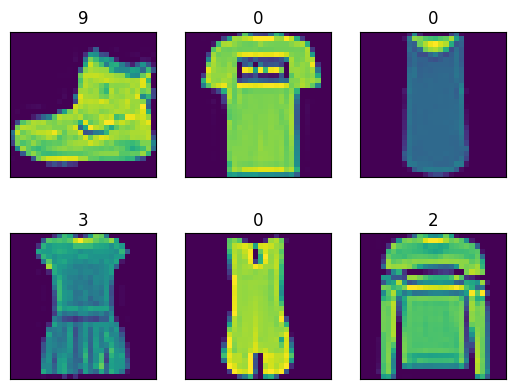

In [4]:

text_labels =range(10)
fig,axes=plt.subplots(2,3)
axes=axes.flatten()#一维
for i in range(6):
    ax=axes[i]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(train_x[0][i][0].cpu())
    ax.set_title(text_labels[train_y[0][i].cpu()])
plt.show()#必须放在cpu上

In [4]:

net1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 1000),
    nn.ReLU(),
nn.Linear(1000, 10))
net=net1
lr=0.0001
epoch=30
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
loss=nn.CrossEntropyLoss()

loss_arr,acc_arr=[],[]
net.train()#启用 BatchNormalization 和 Dropout
for i in range(epoch):
    for j in range(batch_size):
        optimizer.zero_grad()
        y_hat=net(train_x[j])
        l=loss(y_hat,train_y[j])
        l.backward()
        optimizer.step()
    cur_acc=calc_acc(test_x.reshape((-1,1,28,28)),test_y.reshape(-1,1),net)
    print(f'loss= {l:.3f} accuracy={cur_acc:.3f}')        
    loss_arr.append(l)
    acc_arr.append(cur_acc)

loss= 0.224 accuracy=0.934
loss= 0.160 accuracy=0.955
loss= 0.129 accuracy=0.964
loss= 0.107 accuracy=0.969
loss= 0.090 accuracy=0.972
loss= 0.077 accuracy=0.974
loss= 0.066 accuracy=0.974
loss= 0.055 accuracy=0.975
loss= 0.046 accuracy=0.978
loss= 0.040 accuracy=0.979
loss= 0.038 accuracy=0.977
loss= 0.026 accuracy=0.975
loss= 0.016 accuracy=0.978
loss= 0.014 accuracy=0.980
loss= 0.010 accuracy=0.979
loss= 0.005 accuracy=0.980
loss= 0.006 accuracy=0.981
loss= 0.007 accuracy=0.980
loss= 0.003 accuracy=0.980
loss= 0.003 accuracy=0.979
loss= 0.004 accuracy=0.975
loss= 0.002 accuracy=0.981
loss= 0.003 accuracy=0.980
loss= 0.001 accuracy=0.982
loss= 0.002 accuracy=0.981
loss= 0.002 accuracy=0.981
loss= 0.002 accuracy=0.981
loss= 0.001 accuracy=0.981
loss= 0.001 accuracy=0.983
loss= 0.000 accuracy=0.982


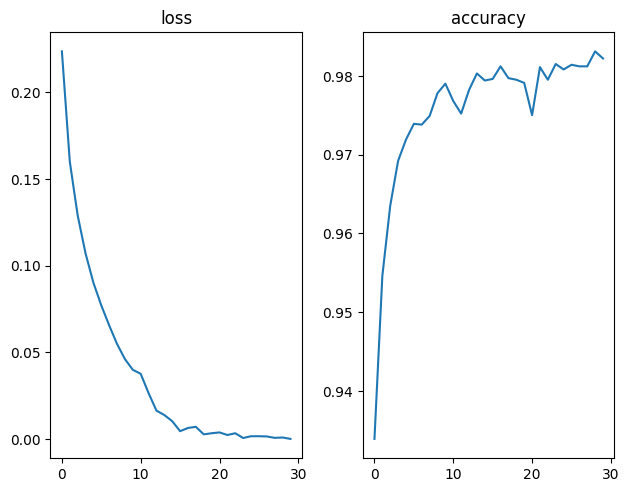

In [5]:
plot_res()

In [6]:
torch.save(net1.state_dict(), "/kaggle/working/net1.params")

In [7]:
net2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 500),
    nn.ReLU(),
    nn.Linear(500, 1000),
    nn.ReLU(),
    nn.Linear(1000,300),
    nn.ReLU(),
nn.Linear(300, 10))

net=net2
loss_arr,acc_arr=[],[]
lr=0.001
epoch=30
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)
loss=nn.CrossEntropyLoss()
start_train()

loss= 0.212 accuracy=0.944
loss= 0.142 accuracy=0.963
loss= 0.125 accuracy=0.971
loss= 0.125 accuracy=0.969
loss= 0.082 accuracy=0.969
loss= 0.065 accuracy=0.975
loss= 0.053 accuracy=0.974
loss= 0.029 accuracy=0.976
loss= 0.042 accuracy=0.972
loss= 0.029 accuracy=0.974
loss= 0.038 accuracy=0.978
loss= 0.028 accuracy=0.974
loss= 0.017 accuracy=0.977
loss= 0.007 accuracy=0.980
loss= 0.006 accuracy=0.980
loss= 0.014 accuracy=0.981
loss= 0.009 accuracy=0.979
loss= 0.013 accuracy=0.981
loss= 0.003 accuracy=0.982
loss= 0.006 accuracy=0.982
loss= 0.015 accuracy=0.980
loss= 0.002 accuracy=0.983
loss= 0.010 accuracy=0.980
loss= 0.006 accuracy=0.981
loss= 0.001 accuracy=0.982
loss= 0.007 accuracy=0.980
loss= 0.008 accuracy=0.978
loss= 0.001 accuracy=0.979
loss= 0.006 accuracy=0.983
loss= 0.006 accuracy=0.979


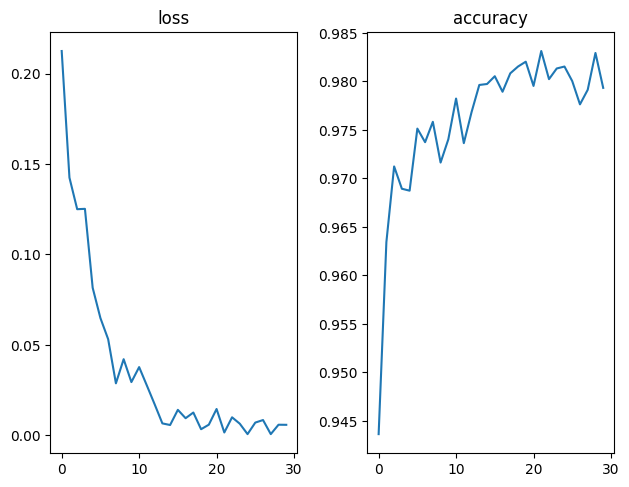

In [9]:
plot_res()

In [10]:
torch.save(net.state_dict(), "/kaggle/working/net2.params")

In [13]:
net3 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 500),
            nn.ReLU(),
            nn.Dropout(0.5),  # 添加Dropout
            nn.Linear(500, 1000),
            nn.ReLU(),
            nn.Dropout(0.2),  # 添加Dropout
            nn.Linear(1000, 300),
            nn.ReLU(),
            nn.Dropout(0.5),  # 添加Dropout
            nn.Linear(300, 10)
        )

net=net3
loss_arr,acc_arr=[],[]
lr=0.001
epoch=100
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.0001)
loss=nn.CrossEntropyLoss()
start_train()

loss= 0.223 accuracy=0.933
loss= 0.170 accuracy=0.952
loss= 0.151 accuracy=0.955
loss= 0.107 accuracy=0.963
loss= 0.112 accuracy=0.968
loss= 0.101 accuracy=0.962
loss= 0.107 accuracy=0.967
loss= 0.070 accuracy=0.970
loss= 0.091 accuracy=0.970
loss= 0.076 accuracy=0.967
loss= 0.071 accuracy=0.968
loss= 0.090 accuracy=0.969
loss= 0.069 accuracy=0.968
loss= 0.059 accuracy=0.971
loss= 0.099 accuracy=0.973
loss= 0.078 accuracy=0.971
loss= 0.064 accuracy=0.971
loss= 0.064 accuracy=0.973
loss= 0.059 accuracy=0.972
loss= 0.048 accuracy=0.973
loss= 0.077 accuracy=0.970
loss= 0.058 accuracy=0.973
loss= 0.041 accuracy=0.971
loss= 0.047 accuracy=0.972
loss= 0.037 accuracy=0.973
loss= 0.051 accuracy=0.974
loss= 0.071 accuracy=0.973
loss= 0.065 accuracy=0.974
loss= 0.059 accuracy=0.973
loss= 0.042 accuracy=0.973
loss= 0.042 accuracy=0.972
loss= 0.038 accuracy=0.973
loss= 0.047 accuracy=0.973
loss= 0.046 accuracy=0.975
loss= 0.056 accuracy=0.975
loss= 0.049 accuracy=0.974
loss= 0.033 accuracy=0.973
l

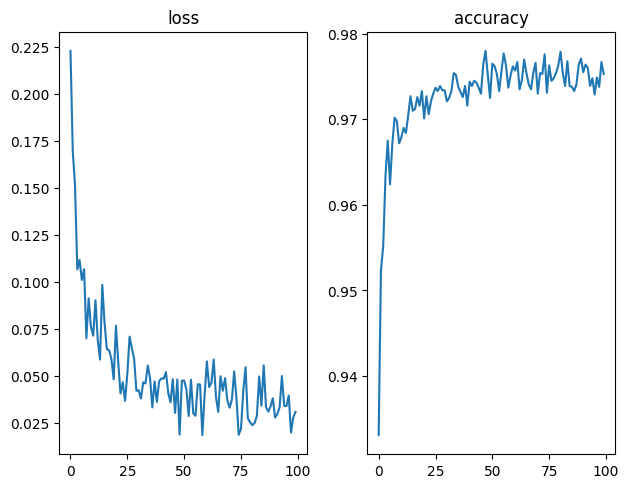

In [14]:
import numpy as np
fig,ax=plt.subplots(1,2)
for i in range(len(loss_arr)):
    if(isinstance(loss_arr[i],np.ndarray)==False):
        loss_arr[i]=loss_arr[i].to(torch.device('cpu')).detach().numpy()

ax[0].plot(range(len(loss_arr)),loss_arr)
ax[1].plot(range(len(loss_arr)),acc_arr)

plt.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
#     wspace=0.45, hspace=None)
ax[0].set_title("loss")
ax[1].set_title("accuracy")
plt.show()


In [15]:
torch.save(net.state_dict(), "/kaggle/working/net3.params")

In [42]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,16,5),# 16*28*28
            nn.ReLU(),
            nn.MaxPool2d(2,2),# 16*14*14
            nn.Conv2d(16,32,5),# 32*10*10
            nn.ReLU(),
            nn.MaxPool2d(2,2)# 32*5*5
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*4*4,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
        )
    
    def forward(self, x):
        x = self.features(x)
#         print(x.shape)
        x = x.view(-1, 32*4*4)
        x = self.classifier(x)
        return x
    
def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            optimizer.step()
        
        cur_acc=calc_acc(test_x.reshape((-1,1,28,28)),test_y.reshape(-1,1),net)
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        if(i%10)==0:
            print(f'epoch {i} loss= {l:.3f} accuracy={cur_acc:.3f}')        
           
    
net=LeNet5()

loss_arr,acc_arr=[],[]
lr=0.0001
epoch=300
net.to(device)
# print(net(train_x[0]).shape)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.001)
loss=nn.CrossEntropyLoss()
start_train()

epoch 0 loss= 1.844 accuracy=0.599
epoch 10 loss= 0.200 accuracy=0.949
epoch 20 loss= 0.156 accuracy=0.972
epoch 30 loss= 0.135 accuracy=0.980
epoch 40 loss= 0.118 accuracy=0.983
epoch 50 loss= 0.104 accuracy=0.985
epoch 60 loss= 0.091 accuracy=0.987
epoch 70 loss= 0.081 accuracy=0.987
epoch 80 loss= 0.074 accuracy=0.988
epoch 90 loss= 0.068 accuracy=0.988
epoch 100 loss= 0.064 accuracy=0.989
epoch 110 loss= 0.060 accuracy=0.989
epoch 120 loss= 0.057 accuracy=0.989
epoch 130 loss= 0.054 accuracy=0.989
epoch 140 loss= 0.051 accuracy=0.990
epoch 150 loss= 0.049 accuracy=0.989
epoch 160 loss= 0.046 accuracy=0.990
epoch 170 loss= 0.044 accuracy=0.990
epoch 180 loss= 0.042 accuracy=0.990
epoch 190 loss= 0.040 accuracy=0.990
epoch 200 loss= 0.039 accuracy=0.990
epoch 210 loss= 0.037 accuracy=0.990
epoch 220 loss= 0.036 accuracy=0.990
epoch 230 loss= 0.035 accuracy=0.990
epoch 240 loss= 0.034 accuracy=0.990
epoch 250 loss= 0.033 accuracy=0.989
epoch 260 loss= 0.032 accuracy=0.990
epoch 270 lo

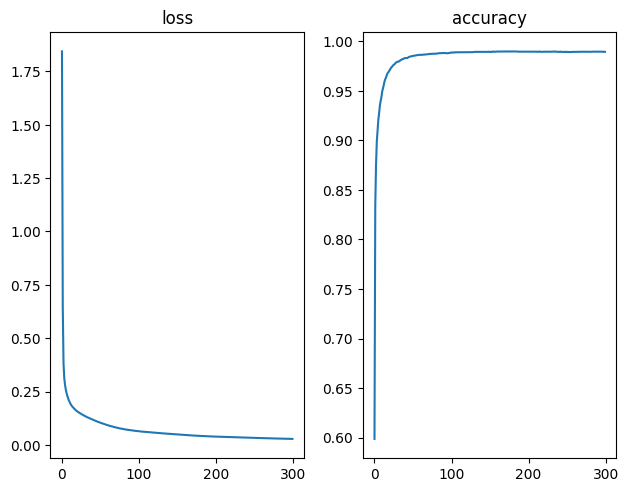

In [43]:
plot_res()

In [44]:
torch.save(net.state_dict(), "/kaggle/working/lenet5.params")

In [6]:
# Fashion 4
net3 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 500),
            nn.ReLU(),
            nn.Dropout(0.5),  # 添加Dropout
            nn.Linear(500, 1000),
            nn.ReLU(),
            nn.Dropout(0.2),  # 添加Dropout
            nn.Linear(1000, 300),
            nn.ReLU(),
            nn.Dropout(0.5),  # 添加Dropout
            nn.Linear(300, 10)
        )

net=net3
loss_arr,acc_arr=[],[]
lr=0.001
epoch=300
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.0001)
loss=nn.CrossEntropyLoss()
start_train()

loss= 0.512 accuracy=0.814
loss= 0.438 accuracy=0.833
loss= 0.433 accuracy=0.836
loss= 0.392 accuracy=0.839
loss= 0.359 accuracy=0.842
loss= 0.353 accuracy=0.848
loss= 0.365 accuracy=0.849
loss= 0.316 accuracy=0.859
loss= 0.320 accuracy=0.857
loss= 0.333 accuracy=0.864
loss= 0.342 accuracy=0.859
loss= 0.294 accuracy=0.862
loss= 0.323 accuracy=0.861
loss= 0.350 accuracy=0.865
loss= 0.304 accuracy=0.864
loss= 0.327 accuracy=0.867
loss= 0.297 accuracy=0.866
loss= 0.325 accuracy=0.867
loss= 0.303 accuracy=0.865
loss= 0.299 accuracy=0.868
loss= 0.308 accuracy=0.865
loss= 0.309 accuracy=0.869
loss= 0.314 accuracy=0.868
loss= 0.314 accuracy=0.867
loss= 0.316 accuracy=0.868
loss= 0.273 accuracy=0.869
loss= 0.298 accuracy=0.869
loss= 0.286 accuracy=0.869
loss= 0.273 accuracy=0.871
loss= 0.301 accuracy=0.871
loss= 0.309 accuracy=0.873
loss= 0.270 accuracy=0.868
loss= 0.303 accuracy=0.872
loss= 0.260 accuracy=0.877
loss= 0.276 accuracy=0.873
loss= 0.288 accuracy=0.877
loss= 0.299 accuracy=0.872
l

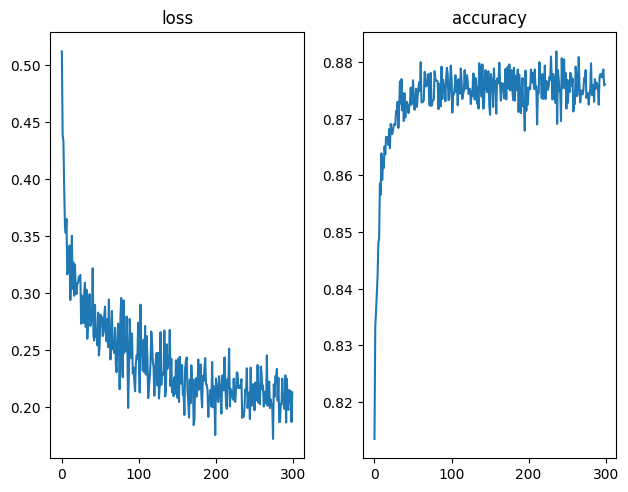

In [8]:
plot_res()

In [9]:
torch.save(net.state_dict(), "/kaggle/working/net-fashion.params")

In [12]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,16,5),# 16*28*28
            nn.ReLU(),
            nn.MaxPool2d(2,2),# 16*14*14
            nn.Conv2d(16,32,5),# 32*10*10
            nn.ReLU(),
            nn.MaxPool2d(2,2)# 32*5*5
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*4*4,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
        )
    
    def forward(self, x):
        x = self.features(x)
#         print(x.shape)
        x = x.view(-1, 32*4*4)
        x = self.classifier(x)
        return x
    
def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            optimizer.step()
        
        cur_acc=calc_acc(test_x.reshape((-1,1,28,28)),test_y.reshape(-1,1),net)
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        if(i%10)==0:
            print(f'epoch {i} loss= {l:.3f} accuracy={cur_acc:.3f}')        
           
    
net=LeNet5()

loss_arr,acc_arr=[],[]
lr=0.0001
epoch=1000
net.to(device)
# print(net(train_x[0]).shape)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.001)
loss=nn.CrossEntropyLoss()
start_train()

epoch 0 loss= 1.787 accuracy=0.420
epoch 10 loss= 0.558 accuracy=0.772
epoch 20 loss= 0.462 accuracy=0.812
epoch 30 loss= 0.415 accuracy=0.835
epoch 40 loss= 0.388 accuracy=0.844
epoch 50 loss= 0.372 accuracy=0.853
epoch 60 loss= 0.357 accuracy=0.859
epoch 70 loss= 0.345 accuracy=0.865
epoch 80 loss= 0.333 accuracy=0.868
epoch 90 loss= 0.323 accuracy=0.871
epoch 100 loss= 0.315 accuracy=0.874
epoch 110 loss= 0.307 accuracy=0.876
epoch 120 loss= 0.299 accuracy=0.879
epoch 130 loss= 0.293 accuracy=0.881
epoch 140 loss= 0.287 accuracy=0.883
epoch 150 loss= 0.281 accuracy=0.885
epoch 160 loss= 0.276 accuracy=0.886
epoch 170 loss= 0.272 accuracy=0.887
epoch 180 loss= 0.267 accuracy=0.887
epoch 190 loss= 0.263 accuracy=0.888
epoch 200 loss= 0.259 accuracy=0.889
epoch 210 loss= 0.255 accuracy=0.889
epoch 220 loss= 0.252 accuracy=0.890
epoch 230 loss= 0.249 accuracy=0.890
epoch 240 loss= 0.246 accuracy=0.890
epoch 250 loss= 0.242 accuracy=0.891
epoch 260 loss= 0.240 accuracy=0.891
epoch 270 lo

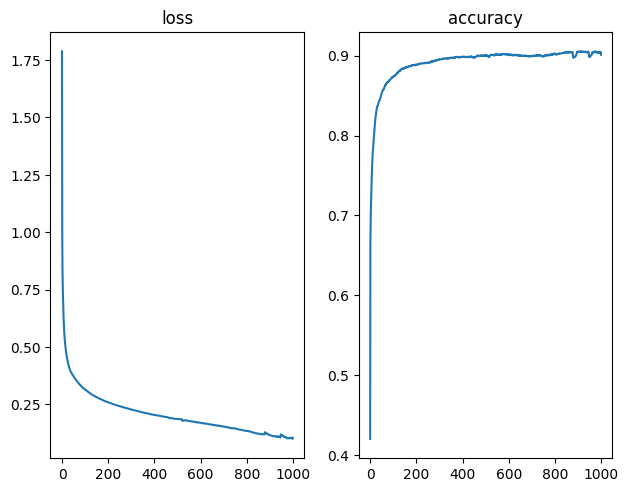

In [14]:
plot_res()

In [15]:
torch.save(net.state_dict(), "/kaggle/working/lenet5-fashion.params")